In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta
import requests
import io
proxy_dict = {
    'http': "http://J0438567@10.16.152.74:8080",
    'https': "http://J0438567@10.16.152.74:8080"
}

In [2]:
url = "https://www.data.gouv.fr/fr/datasets/r/dd0de5d9-b5a5-4503-930a-7b08dc0adc7c"
req = requests.get(url, proxies=proxy_dict).text
df_raw = pd.read_csv(io.StringIO(req), sep=';', parse_dates=['jour'], index_col='jour')
df_raw = df_raw[df_raw['cl_age90'] == 0].drop(['cl_age90'], axis=1)
df_raw['pos_semaine'] = df_raw.index.weekday
df_raw['I'] = df_raw['P'] / df_raw['T']
df_raw.tail(10)

,fra,P_f,P_h,P,T_f,T_h,T,pop,pos_semaine,I
jour,,,,,,,,,,
2021-01-28,FR,12974,10829,23910,212533,173536,387261,67114995.0,3,0.061741
2021-01-29,FR,13287,11414,24819,227310,190119,418692,67114995.0,4,0.059277
2021-01-30,FR,7309,6386,13755,113933,103672,218249,67114995.0,5,0.063024
2021-01-31,FR,1796,1580,3385,23190,21533,44810,67114995.0,6,0.075541
2021-02-01,FR,17236,14483,31851,246163,197353,444862,67114995.0,0,0.071597
2021-02-02,FR,13168,11056,24340,217890,167858,387125,67114995.0,1,0.062874
2021-02-03,FR,11916,9953,21947,196215,154391,351934,67114995.0,2,0.062361
2021-02-04,FR,11706,9993,21780,210395,167322,378922,67114995.0,3,0.057479
2021-02-05,FR,12012,10509,22614,229504,191240,422086,67114995.0,4,0.053577


In [7]:
if df_raw['pos_semaine'].iloc[-1] < 5:
    df = df_raw[df_raw['pos_semaine']<5].resample('W').mean()
elif df_raw['pos_semaine'].iloc[-1] == 5:
    df = df_raw[df_raw['pos_semaine']<6].resample('W').mean()
else:
    df = df_raw.resample('W').mean()
df['I'] = df['P'] / df['T']
df.tail()

,P_f,P_h,P,T_f,T_h,T,pop,pos_semaine,I
jour,,,,,,,,,
2021-01-10,11223.666667,9437.166667,20727.833333,182340.833333,145196.333333,328294.166667,67114995.0,2.5,0.063138
2021-01-17,11419.500000,9551.500000,21058.166667,178717.000000,144250.333333,323867.333333,67114995.0,2.5,0.065021
2021-01-24,12538.333333,10510.500000,23135.333333,183878.000000,148479.000000,333339.000000,67114995.0,2.5,0.069405
2021-01-31,12708.500000,10626.500000,23437.833333,198382.000000,161721.166667,361235.166667,67114995.0,2.5,0.064882
2021-02-07,12105.666667,10336.666667,22531.666667,202812.500000,163521.166667,367537.000000,67114995.0,2.5,0.061304


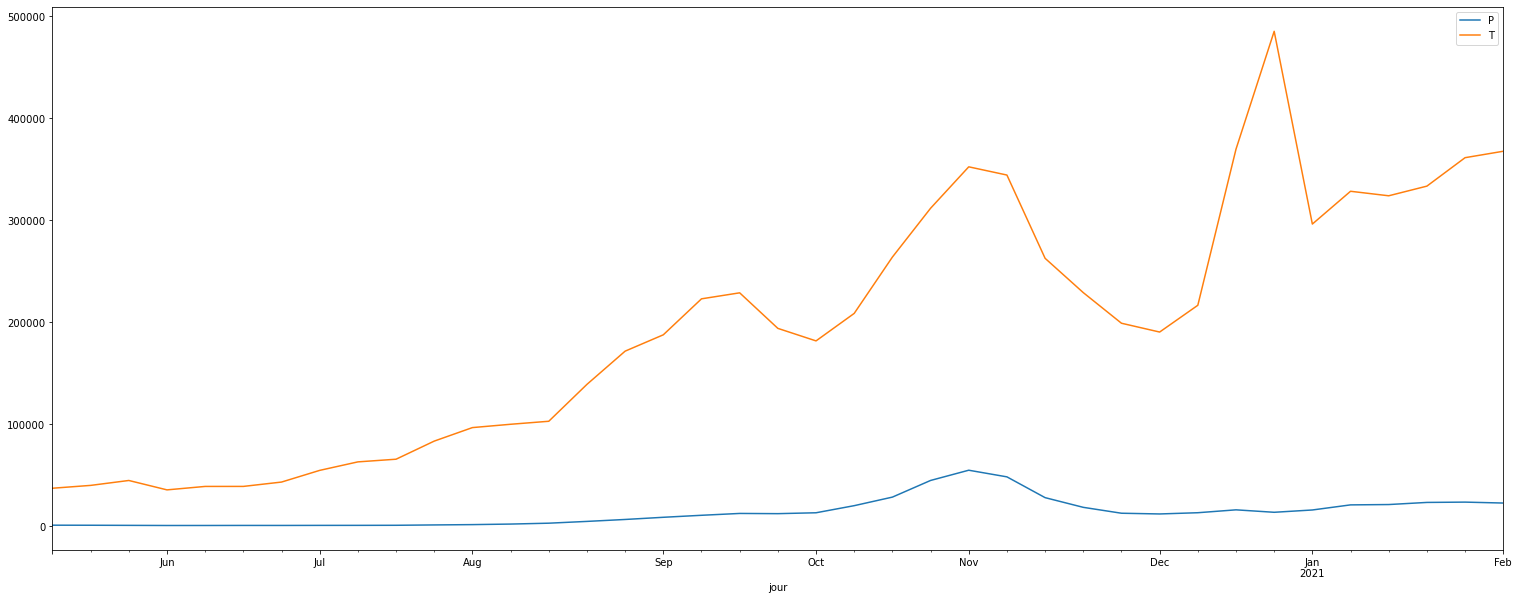

In [8]:
df.loc[:, ['P', 'T']].plot(figsize=(26, 10))
plt.show()

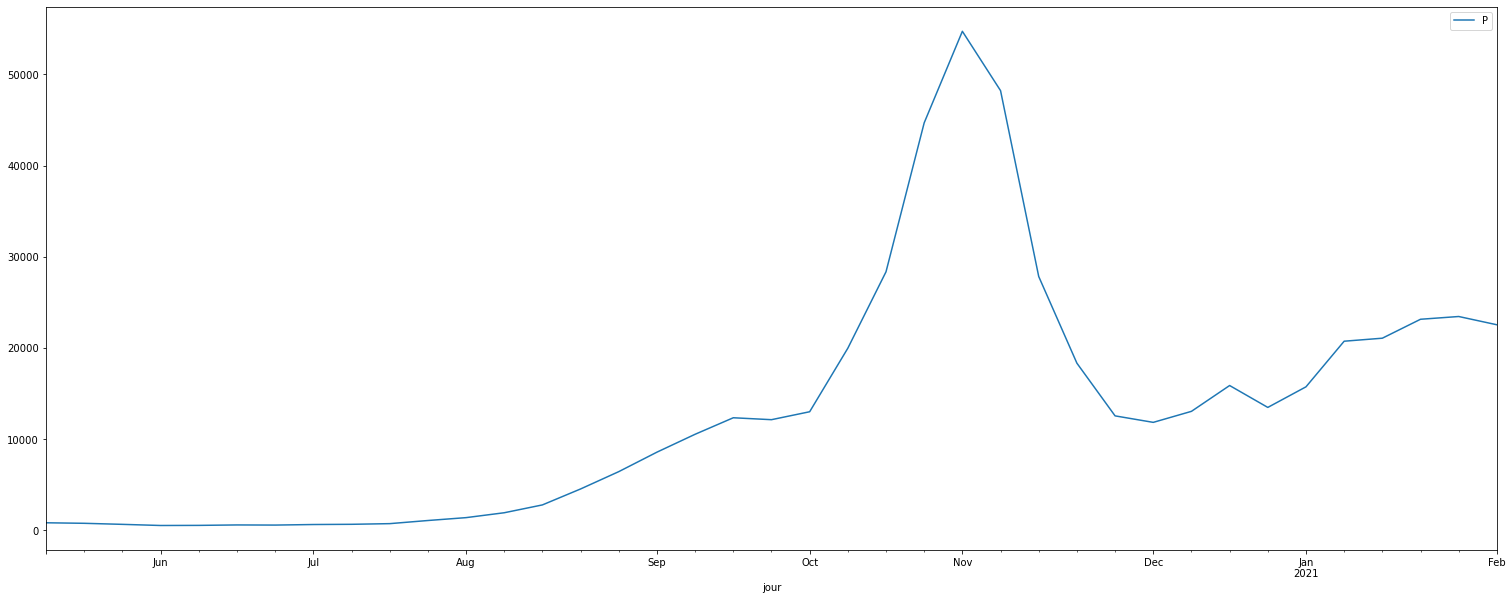

In [9]:
df.loc[:, ['P']].plot(figsize=(26, 10))
plt.show()

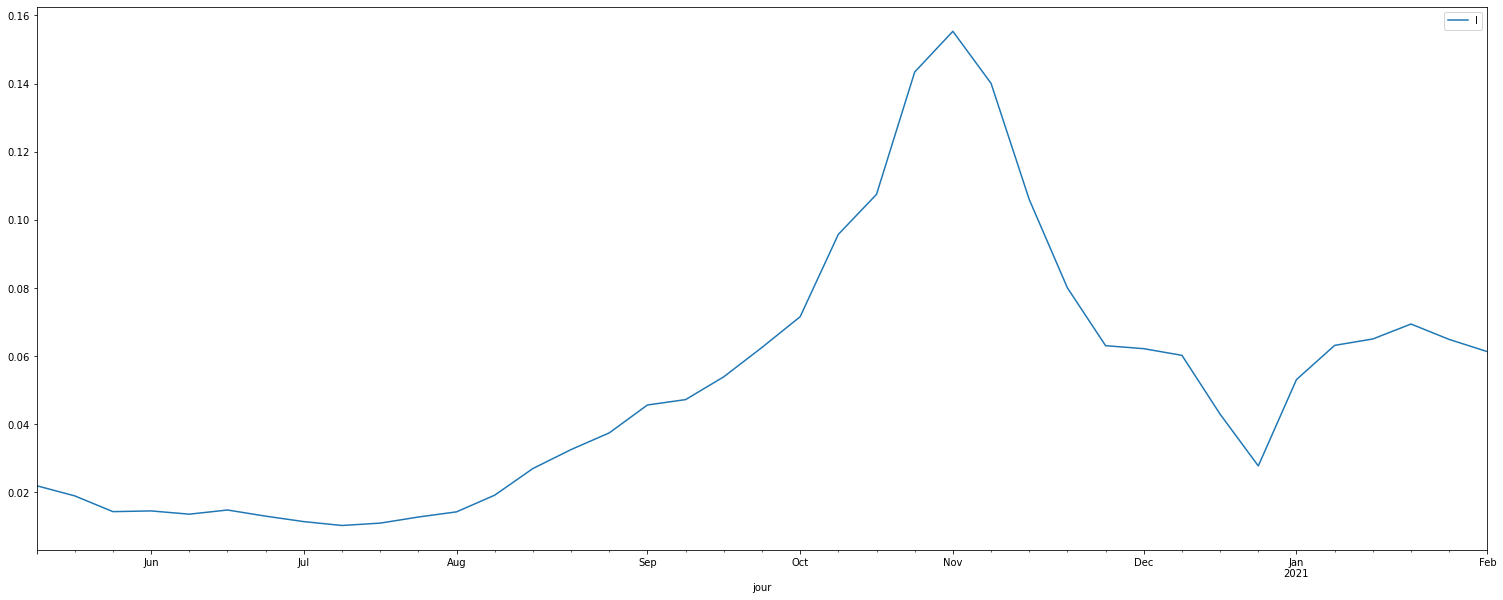

In [10]:
df.loc[:, ['I']].plot(figsize=(26, 10))
plt.show()